# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

## Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [4]:
# import the final data set
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(1863, 12)


,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,property_type,popular,recession,property_age
0,295850,234,81,1,1,584,0,0,Condo,0,1,0
1,216500,169,51,1,1,612,0,1,Condo,0,0,41
2,279900,216,74,1,1,615,0,0,Condo,0,1,49
3,379900,265,92,1,1,618,33541,0,Condo,0,0,5
4,340000,88,30,1,1,634,0,0,Condo,0,0,10


## One hot encoding
Converting categorical variables to flag variables

In [20]:
df = pd.get_dummies(df, columns = ['property_type']) #drop_first

In [21]:
df.head()

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,234,81,1,1,584,0,0,0,1,0,0,1
1,216500,169,51,1,1,612,0,1,0,0,41,0,1
2,279900,216,74,1,1,615,0,0,0,1,49,0,1
3,379900,265,92,1,1,618,33541,0,0,0,5,0,1
4,340000,88,30,1,1,634,0,0,0,0,10,0,1


In [31]:
#df.describe()

**Before you begin modeling, you should split the data in train and test subsets.**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [22]:
# seperate the target variable
y = df.price

# seperate the features
x = df.drop('price', axis=1)

# df.iloc[:,1:3]

In [23]:
# import module for train-test split
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=1234)

In [24]:
# check records in each split
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1490, 12), (373, 12), (1490,), (373,))

In [25]:
# import the model
from sklearn.linear_model import LinearRegression

# train the model
#del model
lrmodel = LinearRegression().fit(xtrain,ytrain)

In [26]:
# make prediction on train set
ytrain_pred = lrmodel.predict(xtrain)

In [27]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, ytrain)
train_mae

97227.57775824078

In [28]:
# make predictions using the x_test values
ytest_pred = lrmodel.predict(xtest)

In [29]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

86427.7798991032

## Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(xtrain,ytrain)

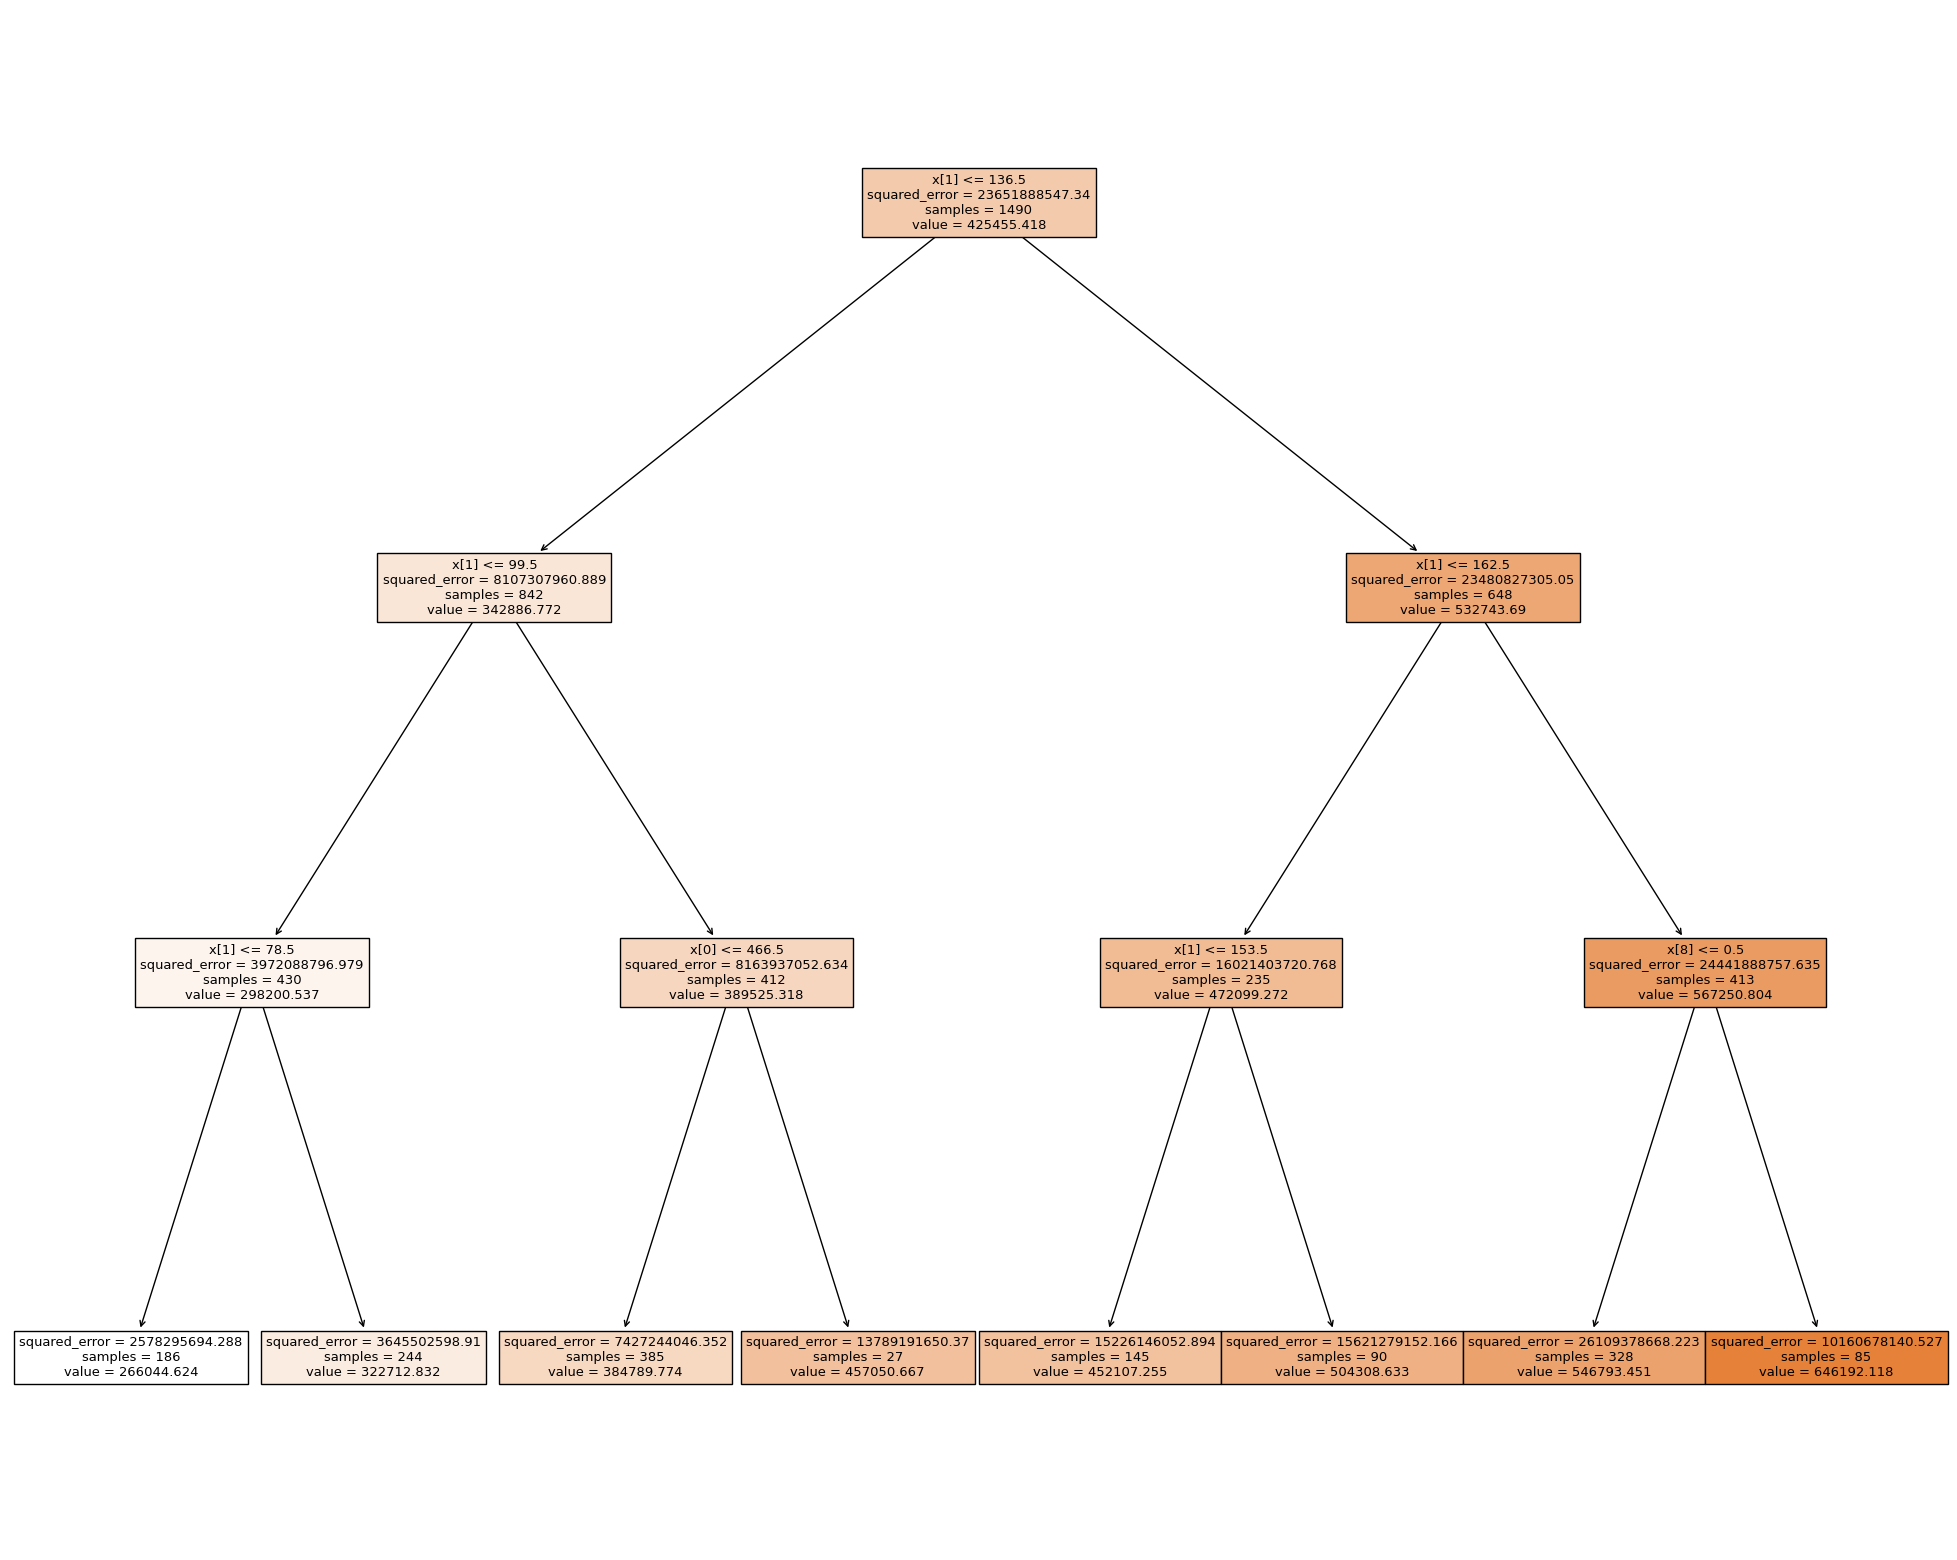

In [34]:
# plotting tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, filled=True)
plt.show()

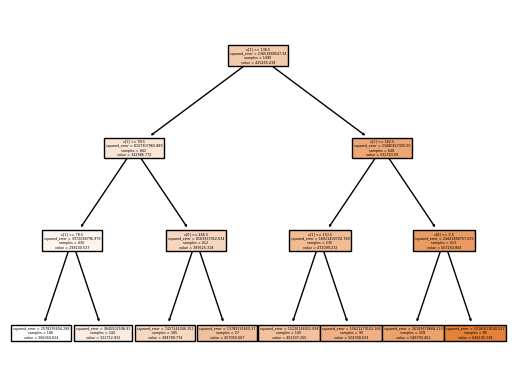

In [32]:
# Prune the tree using hyperparameters
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=30).fit(xtrain,ytrain)
from sklearn import tree
tree.plot_tree(dt, filled=True);


In [36]:
ytrain_pred = dt.predict(xtrain)
dt_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error is',dt_mae)

Train error is 82393.86849553732


In [39]:
# make predictions using the x_test values
ytest_pred = dt.predict(xtest)

# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

74837.37947455472

## Random Forest Model

In [42]:
# import Random Forest model from scikit learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,criterion='absolute_error').fit(xtrain,ytrain)
ytrain_pred = rf.predict(xtrain)
rftrain_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error RF model is',rftrain_mae)

Train error RF model is 31103.45999496644


In [43]:
# make predictions on the x_test values
ytest_pred = rf.predict(xtest)

# evaluate the model
rftest_mae = mean_absolute_error(ytest_pred, ytest)
rftest_mae

70816.59067024129

#### From the observations above, answers the following questions:

Q1. Which model gave the lowest error? - 1 point

Ans:

Q2. Why was linear regression not a suitable choice for this data? - 1 point

Ans:

Q3. Which are the top 5 important features in this dataset? - 1 point

Ans:

## Saving the Model

## Pickle: 

* The pickle module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure. 

* The saving of data is called Serialization, while restoring the data is called Deserialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`. 
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [44]:
# import pickle to save model
import pickle
 
# Save the trained model on the drive 
pickle.dump(lrmodel, open('RE_Model','wb'))

In [45]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [46]:
np.array(xtrain.loc[22])

array([139,  42,   1,   1, 703,   0,   1,   0,   0,  13,   0,   1])

In [47]:
ytrain[22]

240000

In [49]:
df

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,234,81,1,1,584,0,0,0,1,0,0,1
1,216500,169,51,1,1,612,0,1,0,0,41,0,1
2,279900,216,74,1,1,615,0,0,0,1,49,0,1
3,379900,265,92,1,1,618,33541,0,0,0,5,0,1
4,340000,88,30,1,1,634,0,0,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,760000,881,249,5,5,7842,436035,1,0,0,5,1,0
1859,690000,1553,473,5,6,6501,23086,1,0,0,59,1,0
1860,600000,942,287,5,6,7064,217800,1,0,0,4,1,0
1861,759900,803,245,5,6,7500,8886,1,0,0,3,1,0


In [50]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[139,  42,   1,   1, 703,   0,   1,  0,   0,   6,   1,  0]])

/Users/swapnil/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([277715.70738286])